# Lab: Linear Regression 2
### Katherine Vickstrom

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# 1. 
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2) # clock speed in MHz 

In [3]:
# 2.
y = df['prp'].values
predictors = ['mmin', 'chmax']
X=df[predictors].values

In [4]:
# 3.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [5]:
# 4.
print("mmin: {:.2f}".format(reg.coef_[0]))
print("chmax: {:.2f}".format(reg.coef_[1]))

mmin: 0.03
chmax: 2.47


In [6]:
# 5.
# Accuracy with both predictors
r1 = reg.score(X_train, y_train) 
print('R-squared with both predictors : {:.2f}'.format(r1))

# Accuracy with one predictor 
predictions = ['mmax']
target = 'prp'
X = df[predictions].values
y = df[target].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42) 
reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

r2 = reg2.score(X_train2, y_train2) 
print('R-squared with one predictor : {:.2f}'.format(r2))

# Both of these predictors used together result in a higher r squared value 

R-squared with both predictors : 0.74
R-squared with one predictor : 0.66


In [7]:
# 6.
r1 = reg.score(X_train, y_train) 
print('R-squared with both predictors : {:.2f}'.format(r1))
# r^2 value for the model is .6 or larger

R-squared with both predictors : 0.74


<AxesSubplot:>

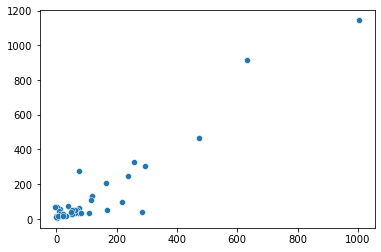

In [8]:
# 7.
predicted = reg.predict(X_test)
sns.scatterplot(x=predicted, y=y_test)